In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import random


## Import csv file

In [13]:
df=pd.read_csv("labels.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   image_id                  16266 non-null  object 
 1   patient_id                16266 non-null  int64  
 2   camera                    16266 non-null  object 
 3   patient_age               10821 non-null  float64
 4   comorbidities             8030 non-null   object 
 5   diabetes_time_y           1910 non-null   object 
 6   insuline                  1714 non-null   object 
 7   patient_sex               16266 non-null  int64  
 8   exam_eye                  16266 non-null  int64  
 9   diabetes                  16266 non-null  object 
 10  nationality               16266 non-null  object 
 11  optic_disc                16266 non-null  int64  
 12  vessels                   16266 non-null  int64  
 13  macula                    16266 non-null  int64  
 14  DR_SDR

In [14]:
df.columns

Index(['image_id', 'patient_id', 'camera', 'patient_age', 'comorbidities',
       'diabetes_time_y', 'insuline', 'patient_sex', 'exam_eye', 'diabetes',
       'nationality', 'optic_disc', 'vessels', 'macula', 'DR_SDRG', 'DR_ICDR',
       'focus', 'iluminaton', 'image_field', 'artifacts',
       'diabetic_retinopathy', 'macular_edema', 'scar', 'nevus', 'amd',
       'vascular_occlusion', 'hypertensive_retinopathy', 'drusens',
       'hemorrhage', 'retinal_detachment', 'myopic_fundus',
       'increased_cup_disc', 'other', 'quality'],
      dtype='object')

### Create a normality variable according to diagnosis

In [15]:
def check_columns(row):
    for column in columns:
        if row[column] != 0:
            return 'abnormal'
    return 'normal'

columns = ['diabetic_retinopathy', 'macular_edema', 'scar', 'nevus', 'amd', 'vascular_occlusion', 'hypertensive_retinopathy', 'drusens', 'hemorrhage', 'retinal_detachment', 'myopic_fundus', 'increased_cup_disc', 'other']
df['normality'] = df.apply(check_columns, axis=1)


In [16]:
df.head()

,image_id,patient_id,camera,patient_age,comorbidities,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,...,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other,quality,normality
0,img00001,1,Canon CR,48.0,diabetes1,12,yes,1,1,yes,...,0,0,0,0,0,0,1,0,Adequate,abnormal
1,img00002,1,Canon CR,48.0,diabetes1,12,yes,1,2,yes,...,0,0,0,0,0,0,1,0,Adequate,abnormal
2,img00003,2,Canon CR,18.0,diabetes1,7,yes,2,1,yes,...,0,0,0,0,0,0,0,0,Adequate,normal
3,img00004,2,Canon CR,18.0,diabetes1,7,yes,2,2,yes,...,0,0,0,0,0,0,0,0,Adequate,normal
4,img00005,3,Canon CR,22.0,diabetes1,11,yes,1,1,yes,...,0,0,0,0,0,0,0,0,Adequate,normal


In [17]:
#show missing values
df.isna().sum().sort_values()

image_id                        0
artifacts                       0
diabetic_retinopathy            0
macular_edema                   0
scar                            0
nevus                           0
amd                             0
image_field                     0
vascular_occlusion              0
drusens                         0
hemorrhage                      0
retinal_detachment              0
myopic_fundus                   0
increased_cup_disc              0
other                           0
hypertensive_retinopathy        0
quality                         0
iluminaton                      0
DR_ICDR                         0
patient_id                      0
camera                          0
focus                           0
exam_eye                        0
diabetes                        0
patient_sex                     0
optic_disc                      0
vessels                         0
macula                          0
DR_SDRG                         0
nationality   

In [18]:
features_with_nan = [features for features in df.columns if df[features].isnull().sum()>=1]

for features in features_with_nan:
    print(features , np.round(df[features].isnull().mean(),4) , '% missing values')

print(len(features_with_nan)) 

patient_age 0.3347 % missing values
comorbidities 0.5063 % missing values
diabetes_time_y 0.8826 % missing values
insuline 0.8946 % missing values
4


In [19]:
#Camera type
print( df['camera'].value_counts(normalize=True))

camera
Canon CR        0.651174
NIKON NF5050    0.348826
Name: proportion, dtype: float64


In [20]:
#Age description
print( df['patient_age'].describe())


count    10821.000000
mean        57.655947
std         18.260156
min          5.000000
25%         47.000000
50%         61.000000
75%         71.000000
max         97.000000
Name: patient_age, dtype: float64


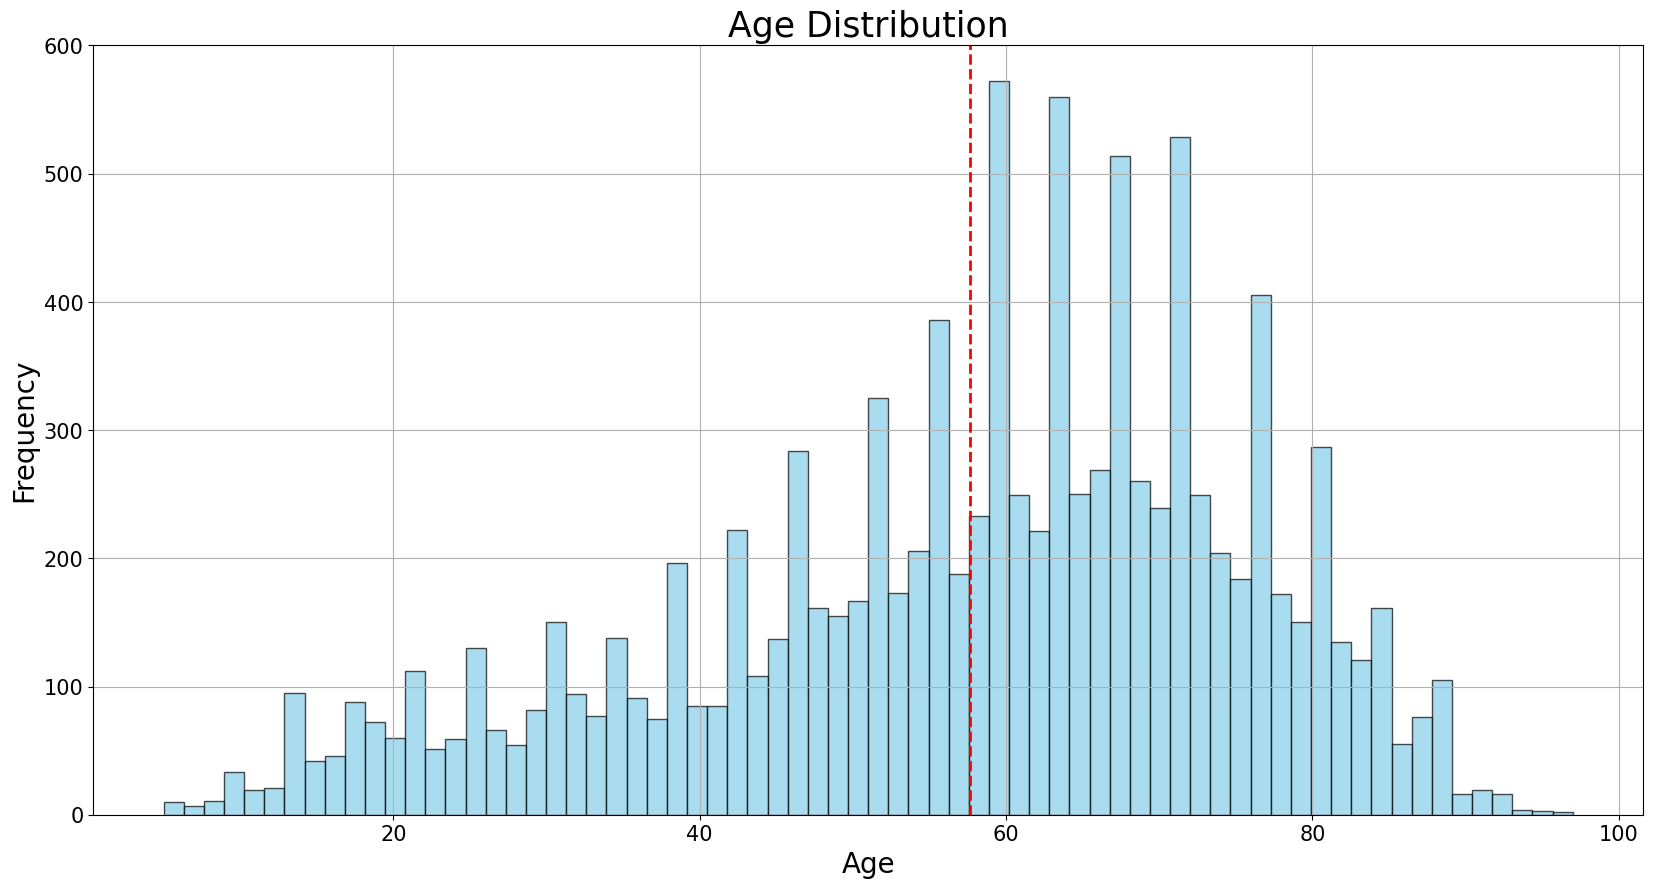

In [21]:
# Plot age distribution
plt.figure(figsize=(20, 10))
plt.hist(df['patient_age'], bins=70, edgecolor='black', color='skyblue', alpha=0.7)

# Calculating the mean
mean_age = np.mean(df['patient_age'])

# Plotting the mean line
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2)
plt.xlabel('Age', fontdict={'fontsize': 20})
plt.ylabel('Frequency', fontdict={'fontsize': 20})
plt.title('Age Distribution', fontdict={'fontsize': 25})
plt.grid(True)

# Adjusting tick labels and font sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [22]:
#Number of Diabetic patients
print(df['diabetes'].value_counts(normalize=True))


diabetes
no     0.841448
yes    0.158552
Name: proportion, dtype: float64


In [23]:
#Patients sex
print(df.patient_sex.value_counts(normalize=True))

patient_sex
2    0.617976
1    0.382024
Name: proportion, dtype: float64


In [24]:
#Exam eye
print(df.exam_eye.value_counts(normalize=True))

exam_eye
1    0.501353
2    0.498647
Name: proportion, dtype: float64


## Image quality

In [25]:
print(df['focus'].value_counts(normalize=True)*100)
print(df['iluminaton'].value_counts(normalize=True)*100)
print(df['image_field'].value_counts(normalize=True)*100)
print(df['artifacts'].value_counts(normalize=True)*100)

focus
1    96.667896
2     3.332104
Name: proportion, dtype: float64
iluminaton
1    99.483585
2     0.516415
Name: proportion, dtype: float64
image_field
1    91.386942
2     8.613058
Name: proportion, dtype: float64
artifacts
1    99.649576
2     0.350424
Name: proportion, dtype: float64


## Labels

In [26]:
#anatomical parameters
print(df.optic_disc.value_counts(normalize=True)*100)
print(df.vessels.value_counts(normalize=True)*100)
print(df.macula.value_counts(normalize=True)*100)

optic_disc
1    79.829091
2    20.170909
Name: proportion, dtype: float64
vessels
1    95.038731
2     4.961269
Name: proportion, dtype: float64
macula
1    71.19759
2    28.80241
Name: proportion, dtype: float64


In [27]:
for column in df.columns[20:33]:
        print(df[column].value_counts(normalize=False))

diabetic_retinopathy
0    15220
1     1046
Name: count, dtype: int64
macular_edema
0    15864
1      402
Name: count, dtype: int64
scar
0    15976
1      290
Name: count, dtype: int64
nevus
0    16132
1      134
Name: count, dtype: int64
amd
0    15900
1      366
Name: count, dtype: int64
vascular_occlusion
0    16163
1      103
Name: count, dtype: int64
hypertensive_retinopathy
0    15983
1      283
Name: count, dtype: int64
drusens
0    13459
1     2807
Name: count, dtype: int64
hemorrhage
0    16170
1       96
Name: count, dtype: int64
retinal_detachment
0    16259
1        7
Name: count, dtype: int64
myopic_fundus
0    15998
1      268
Name: count, dtype: int64
increased_cup_disc
0    13064
1     3202
Name: count, dtype: int64
other
0    15508
1      758
Name: count, dtype: int64


In [28]:
# Normal patients according to pathological classification
print(df['normality'].value_counts(normalize=False))

normality
normal      8460
abnormal    7806
Name: count, dtype: int64


In [49]:
#Quality Parameters
for column in df.columns[16:20]:
        print(df[column].value_counts(),df[column].value_counts(normalize= True))

focus
1    15724
2      542
Name: count, dtype: int64 focus
1    0.966679
2    0.033321
Name: proportion, dtype: float64
iluminaton
1    16182
2       84
Name: count, dtype: int64 iluminaton
1    0.994836
2    0.005164
Name: proportion, dtype: float64
image_field
1    14865
2     1401
Name: count, dtype: int64 image_field
1    0.913869
2    0.086131
Name: proportion, dtype: float64
artifacts
1    16209
2       57
Name: count, dtype: int64 artifacts
1    0.996496
2    0.003504
Name: proportion, dtype: float64


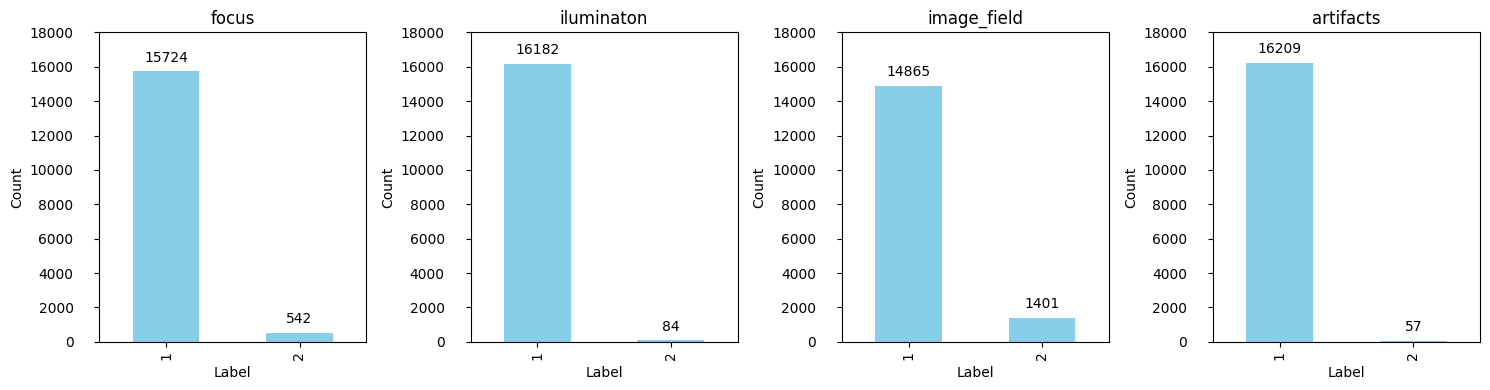

In [61]:
# Quality Parameters
selected_columns = df.columns[16:20]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(15, 4))

for i, column in enumerate(selected_columns):
    # Plot the count as a bar plot
    df[column].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    
    # Add labels and title
    axes[i].set_title(column)
    axes[i].set_xlabel("Label")
    axes[i].set_ylabel("Count")
    
    # Display the count values on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Set maximum y-axis limit to 17000
    axes[i].set_ylim(0, 18000)

    axes[i].tick_params(axis='y', which='major', pad=15)

plt.tight_layout()
plt.show()

## Diabetes patients

In [30]:
diabeticos = df.loc[(df['diabetes'] =='yes')]

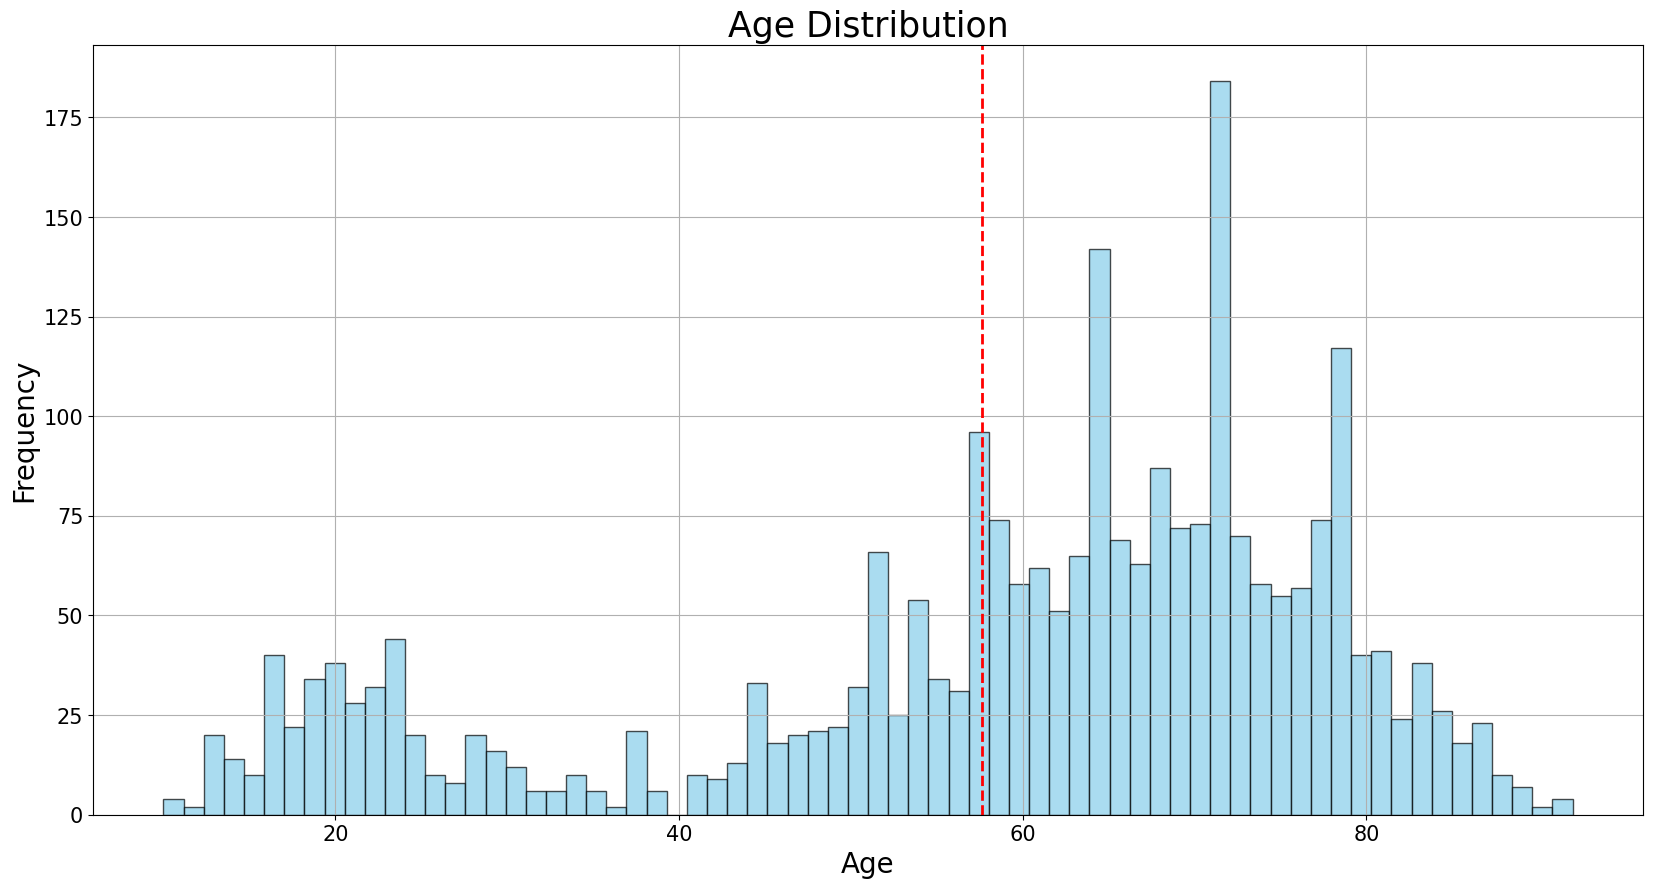

In [31]:
# Plot age distribution
plt.figure(figsize=(20, 10))
plt.hist(diabeticos['patient_age'], bins=70, edgecolor='black', color='skyblue', alpha=0.7)

# Calculating the mean
mean_age = np.mean(df['patient_age'])

# Plotting the mean line
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2)
plt.xlabel('Age', fontdict={'fontsize': 20})
plt.ylabel('Frequency', fontdict={'fontsize': 20})
plt.title('Age Distribution', fontdict={'fontsize': 25})
plt.grid(True)

# Adjusting tick labels and font sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [32]:
#ICDR classification
value_counts = diabeticos['DR_ICDR'].value_counts(ascending=True)
table_diabetes = pd.DataFrame({'DR_ICDR': value_counts.index, 'Count': value_counts.values})


In [33]:
print(table_diabetes.to_string(index=False))

 DR_ICDR  Count
       1    107
       3    127
       2    181
       4    242
       0   1922


In [34]:
diabeticos['DR_ICDR'].value_counts(normalize=True)*100

DR_ICDR
0    74.525010
4     9.383482
2     7.018224
3     4.924389
1     4.148895
Name: proportion, dtype: float64

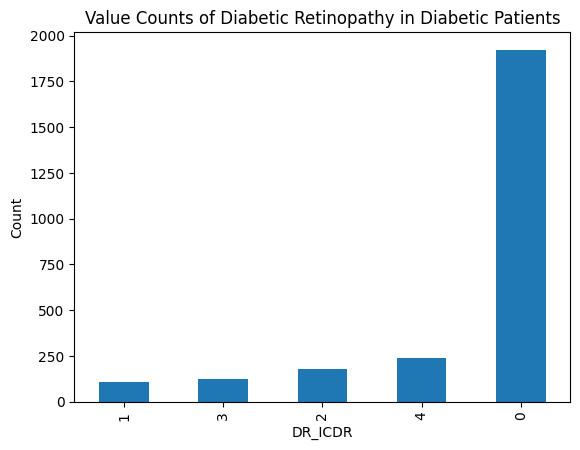

In [35]:
table_diabetes.plot(x='DR_ICDR', y='Count', kind='bar', legend=False)
plt.xlabel('DR_ICDR')
plt.ylabel('Count')
plt.title('Value Counts of Diabetic Retinopathy in Diabetic Patients')

plt.show()



In [36]:
#SDRG classification
print(diabeticos.DR_SDRG.value_counts(ascending=True))

DR_SDRG
2      57
1     165
3     190
4     245
0    1922
Name: count, dtype: int64


## Show examples in different classifications

In [43]:
def show_random_images(labels_path, image_folder, id_column, class_column, max_images_per_class):
    df = pd.read_csv(labels_path)
    grouped_df = df.groupby(class_column)
    sample_ids = []

    for _, group_df in grouped_df:
        num_images = min(len(group_df), max_images_per_class)
        image_ids = random.sample(group_df[id_column].tolist(), num_images)

        sample_ids.extend(image_ids)

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,10))

    for i, image_id in enumerate(sample_ids):
        image_path = os.path.join(image_folder, f'{image_id}.jpg')

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        subplot_row = i // 3
        subplot_col = i % 3

        ax = axes[subplot_row, subplot_col]

        class_value = df.loc[df[id_column] == image_id, class_column].values[0]
        file_name = os.path.basename(image_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'{class_value} - {file_name}')

    plt.tight_layout()
    plt.show()

[ WARN:0@29.089] global loadsave.cpp:248 findDecoder imread_('fundus_photos/img15331.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


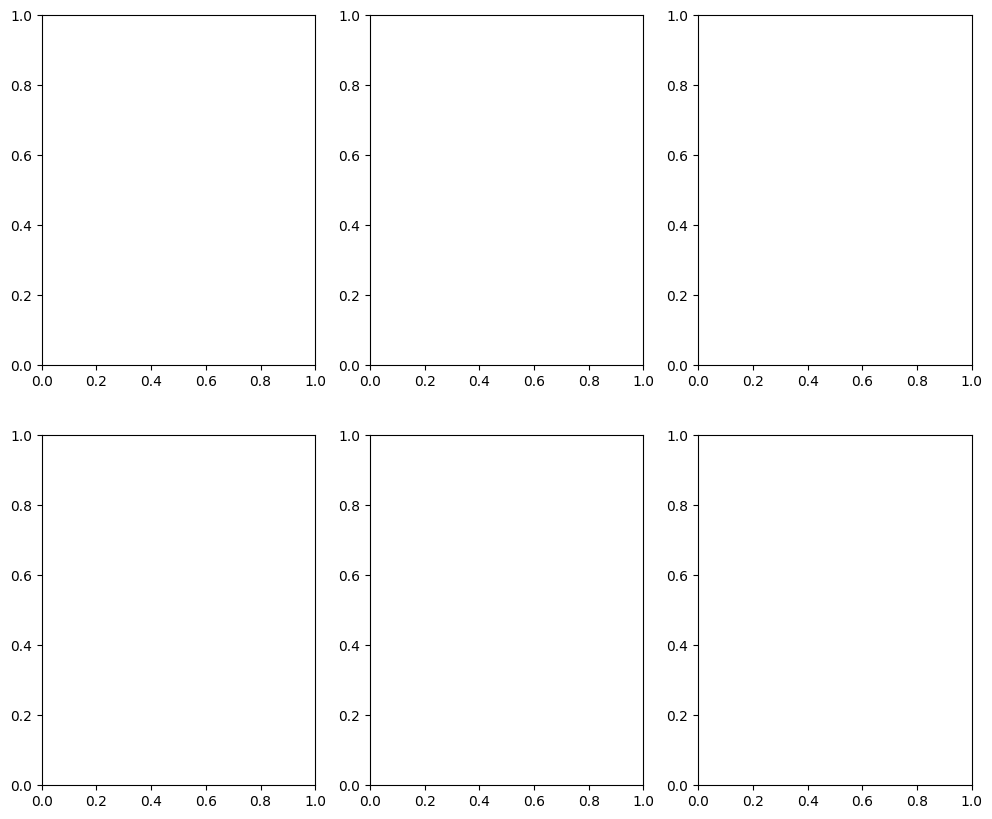

In [45]:
labels_path = 'labels.csv'
image_folder = 'fundus_photos'
id_column = 'image_id'
class_column = 'iluminaton'
max_images_per_class = 3

show_random_images(labels_path, image_folder, id_column, class_column, max_images_per_class)
